In [1]:
## Load the necessary python libraries
import numpy as np
from numpy.random import randn

import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from pylab import rcParams

## ggplot is R-based visualization package with better graphics
plt.style.use('ggplot')

import seaborn as sb

In [2]:
## Setting the figures to display in the jupyter notebook
%matplotlib inline

## Setting the figures' size and display style
rcParams['figure.figsize'] = 5, 4
sb.set_style('whitegrid')

In [3]:
## Check the current total path for working directory
%pwd

'/Users/fengpeicheng/Desktop'

In [4]:
## Load the dataset into the dataframe (df)
address = '/Users/fengpeicheng/Desktop/diabetes.csv'
df = pd.read_csv(address)

In [25]:
## Print out the first 5 rows of the dataframe
df.head().T

,0,1,2,3,4
Pregnancies,6.000,1.000,8.000,1.000,0.000
Glucose,148.000,85.000,183.000,89.000,137.000
BloodPressure,72.000,66.000,64.000,66.000,40.000
SkinThickness,35.000,29.000,0.000,23.000,35.000
Insulin,0.000,0.000,0.000,94.000,168.000
BMI,33.600,26.600,23.300,28.100,43.100
DiabetesPedigreeFunction,0.627,0.351,0.672,0.167,2.288
Age,50.000,31.000,32.000,21.000,33.000
Outcome,1.000,0.000,1.000,0.000,1.000


In [6]:
## Checking the information on the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [24]:
## Checking descriptive statistics/summary of dataframe
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


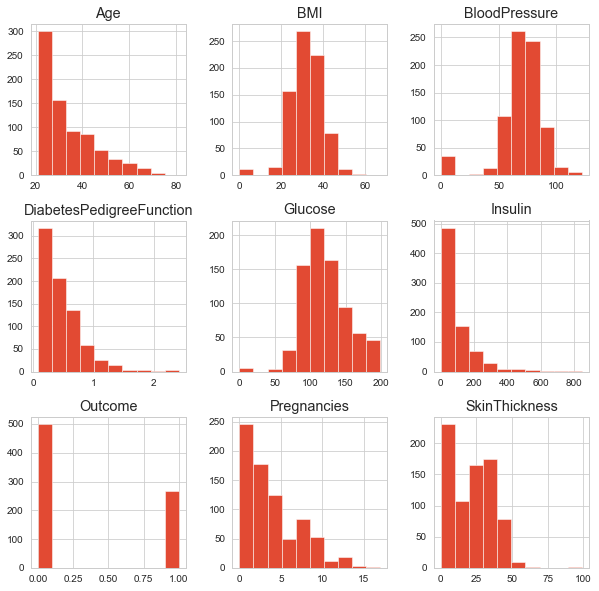

In [23]:
fig1 = df.hist(figsize = (10,10))

In [32]:
## Cleaning the data
df[['BMI', 'BloodPressure', 'Glucose', 'Insulin', 'SkinThickness'
   ]] = df[['BMI', 'BloodPressure', 'Glucose', 'Insulin', 'SkinThickness'
           ]].replace(0,np.NaN)

df['BMI'].fillna(df['BMI'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['Insulin'].fillna(df['Insulin'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].mean(), inplace = True)

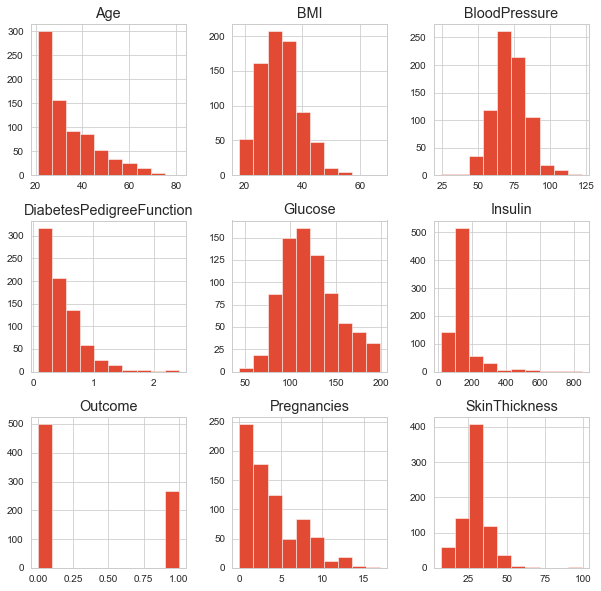

In [33]:
## Plot histograms to get better understanding of dataframe after data cleaning
fig2 = df.hist(figsize = (10,10))

In [8]:
## Create series containing values of all variables for X axis
## All columns other than 'Outcome' result column are included
X = df.drop('Outcome', axis = 1).values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [9]:
## Create series containing outcome values for Y axis
## Only 'Outcome' result is kept, others are dropped
Y = df['Outcome'].values
Y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [10]:
## Import train_test_split library
from sklearn.model_selection import train_test_split

In [11]:

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state = 33, stratify = Y)
X_train, X_validate, Y_train, Y_validate = train_test_split(X_train, Y_train, test_size = 0.11111, random_state = 33, stratify = Y_train)

In [12]:
## Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

## Setup series to store training and test accuracies
neighbors = np.arange(1,16)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))
validate_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    ## Setup a K-NN classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    ## Fit the model
    knn.fit(X_train, Y_train)
    
    ## Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, Y_train)
    
    ## Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, Y_test)
    validate_accuracy[i] = knn.score(X_validate, Y_validate)

In [13]:
train_accuracy

array([1.        , 0.84039088, 0.85993485, 0.80944625, 0.8029316 ,
       0.79153094, 0.79315961, 0.79153094, 0.79478827, 0.78338762,
       0.77850163, 0.77850163, 0.79153094, 0.77850163, 0.78013029])

In [14]:
validate_accuracy

array([0.67532468, 0.71428571, 0.71428571, 0.76623377, 0.7012987 ,
       0.74025974, 0.74025974, 0.76623377, 0.75324675, 0.76623377,
       0.74025974, 0.75324675, 0.7012987 , 0.76623377, 0.72727273])

In [15]:
test_accuracy

array([0.64935065, 0.7012987 , 0.68831169, 0.74025974, 0.76623377,
       0.76623377, 0.76623377, 0.77922078, 0.77922078, 0.76623377,
       0.83116883, 0.77922078, 0.79220779, 0.77922078, 0.80519481])

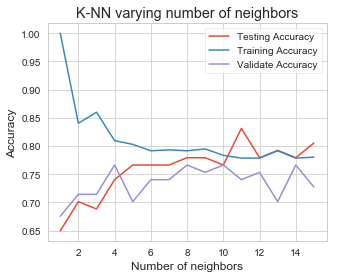

In [16]:
## Generate plot
plt.title('K-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.plot(neighbors, validate_accuracy, label = 'Validate Accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

### Filtering with scalars

In [149]:
knn = KNeighborsClassifier(n_neighbors=8)

In [150]:
knn.fit(X_train,Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=8, p=2,
           weights='uniform')

In [151]:
knn.score(X_test,Y_test)
import time
start = time.time()
knn.score(X_test, Y_test)
end = time.time()
print ("the cost time is", end-start)

the cost time is 0.0013051033020019531


In [152]:
## Import confusion_matrix
## Confusion matrix is a table that is often used to describe the 
## performance of a classification model (or "classifier") on a set
## of test data for which the true values are known. 
from sklearn.metrics import confusion_matrix

In [153]:
Y_pred = knn.predict(X_test)

In [154]:
confusion_matrix(Y_test, Y_pred)
## True Negative = 46
## False Positive = 13
## True Positive = 4
## False Negative = 14
pd.crosstab(Y_test, Y_pred, rownames = ['True'], colnames = ['Predicted'], margins = True)

Predicted,0,1,All
True,,,
0,46,4,50
1,13,14,27
All,59,18,77
